# Introduction à la Science des données


## Travail pratique 05 – Régression linéaire

### Table des matières

[Exercice 1: Analyse Exploratoire des Données](##-Exercice-1:-Analyse-Exploratoire-des-Données)

- [1.1 Récupération des données](#1.1-Récupération-des-données)

- [1.2 Nettoyage des données](#1.2-Nettoyage-des-données)

- [1.3 Interprétation et analyse des graphiques](#1.3-Interprétation-et-analyse-des-graphiques)

[Exercice 2: Régression linéaire simple](#Exercice-2:-Régression-linéaire-simple)

[Exercice 3: Régression linéaire multiple](#Exercice-3:-Régression-linéaire-multiple)

***
Professeurs: Carlos Peña et Stephan Robert

Assistant(s): Thibault Schowing et Xavier Brochet

Rendu:
- Date: 15.01.2023, 23h55 (3 (+2) semaines)


- Modalité: Une fois complété, rendez directement ce notebook modifié et renommé correctement comme suit "**TP5_ISD_SA2022_Nom1_Nom2.ipynb**" en remplaçant Nom1 et Nom2 (et ajouter Nom3 si nécessaire) par vos noms de famille respectifs puis uploadez votre fichier sur Cyberlearn.
- Complétez également vos prénoms et noms ci-dessous.
- Les questions sont généralement indiquées en **gras**, en bleu ou par une liste d'instructrions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 
- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.

Note: 
- Ce TP est noté sur 6, pour un poids de 25%

Étudiant(s): [redacted]

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Effectuer une analyse exploratoire des données 
- À l'aide de l'algorithme vu en cours, réaliser une régression linéaire simple 
- À l'aide de la librairie scikit-learn, réaliser une régression linéaire multiple
- Analyser et expliquer les résultats obtenus

<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (banière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>

<div class="alert alert-block alert-info">
<b>Points: </b> Le TP est noté sur 55 points (les exercices, 4 points pour le rendu, 2 points pour la propreté générale). En cas de retard, les pénalités varient entre 1 et 15 points, ou jusqu'à la non-correction du TP. 
</div>


In [1]:
# Importation des packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

# Différents moyens de standardiser les données mis à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

## Exercice 1: Analyse Exploratoire des Données

### 1.1 Récupération des données

Comme vous avez pu en voir au cours des précédents travaux pratiques, une certaine quantité de datasets publics sont régulièrement utilisés comme base d'apprentissage pour la science des données. Dans ce TP nous utiliserons le dataset connu sous le nom de "California Housing Dataset" qu'il est possible d'obtenir [ici via scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html). Scikit-learn fournit une rapide analyse exploratoire qui a été copiée en partie ci-dessous. 

**Exécutez les cellules ci-dessous en lisant attentivement le code et les commentaires et répondez aux questions qui suivent.**

In [2]:
# On importe la fonction fetch_california_housing

from sklearn.datasets import fetch_california_housing

# Et on l'utilise. 
# l'option "as_frame" permet d'obtenir directement un DataFrame dans le dictionnaire.
# Sans cela, l'élément "frame" serait absent du dictionnaire ci-dessous.
# Les différents éléments du dictionnaire (Data, Target, DESCR, noms de colonnes, etc) sont dès lors directement accessibles

california_housing = fetch_california_housing(as_frame=True) 

In [3]:
# Observez ce que contient la variable california_housing
california_housing

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [4]:
# Étant donné qu'il s'agit d'un dictionnaire, on peut regarder les clés et leur contenu (affiché ci-dessus)
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### Question

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Que contiennent les clés <i>'data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'</i> obtenues ci-dessus ? Donnez une rapide description des différents éléments sous forme de liste à puces. Une ligne par élément suffit.</p>

(5 points)


___
*Réponse:*

> - `data` : Cette clé contient les données réelles de l'ensemble de données, représentées sous forme de tableau où chaque ligne correspond à un seul échantillon et chaque colonne à une caractéristique spécifique.
> - `target` : Cette clé contient les étiquettes ou les cibles pour chaque échantillon de l'ensemble de données. Dans le dataset du logement en Californie, la variable cible est la valeur médiane des maisons pour les districts de Californie, exprimée en centaines de milliers de dollars (100 000 $).
> - `frame` : Cette clé contient les données présentes dans `data` sous forme de dataframe avec une colonne supplémentaire contenant les valeurs de `target`.
> - `target_names` : Cette clé contient le nom de la colonne de données présente dans `target`.
> - `feature_names` : Cette clé contient les noms des caractéristiques pour chaque colonne du tableau de données `data`.
> - `DESCR` : Cette clé contient une description de l'ensemble de données, y compris des informations sur les données, la source des données et toute référence ou citation pertinente.

___

En utilisant print(), on peut afficher de manière plus lisible l'élément "DESCR" du dictionnaire. 

*(car **print()** va interpréter les caractères spéciaux comme '\n' -> retour à la ligne)*

In [5]:
print(california_housing["DESCR"])

# Aussi accessible en utilisant cette notation: 
#print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

En accédant à l'élément *frame*, on peut commencer à travailler comme d'habitude. 

Observons rapidement nos données:

In [6]:
# Les 5 premières observations
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C'est un peu long à écrire "california_housing.frame". Affectons ça à notre variable "df" habituelle, ou plutôt "df_raw" car nous allons encore un peu le modifier (preprocessing) avant d'en avoir une version finale. **Attention, petit rappel: si vous exécutez une autre affectation à une variable "df" dans un autre notebook qui tourne avec le même kernel, il faudra réafecter la variable ici. Vous pouvez à tout moment exécuter "cell > run All" pour tout réexécuter. Suivant le contenu cela peut prendre du temps par contre !**

In [7]:
# Données brutes
df_raw = california_housing.frame

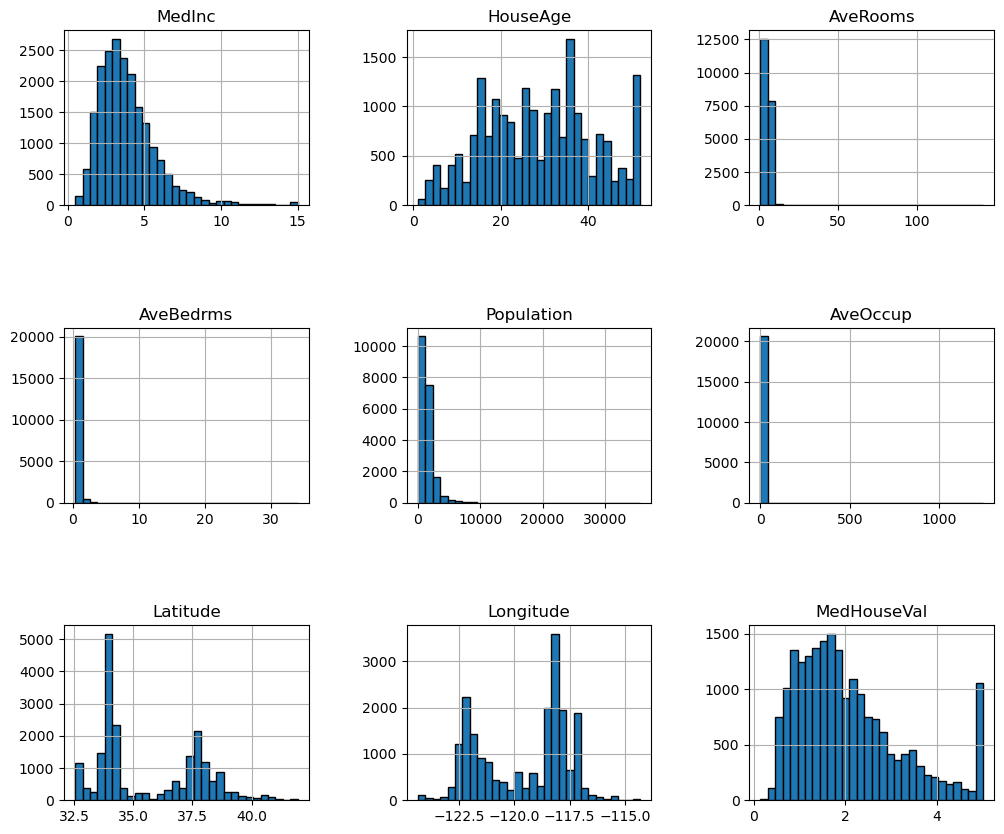

In [8]:
# Histogrammes des variables
df_raw.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

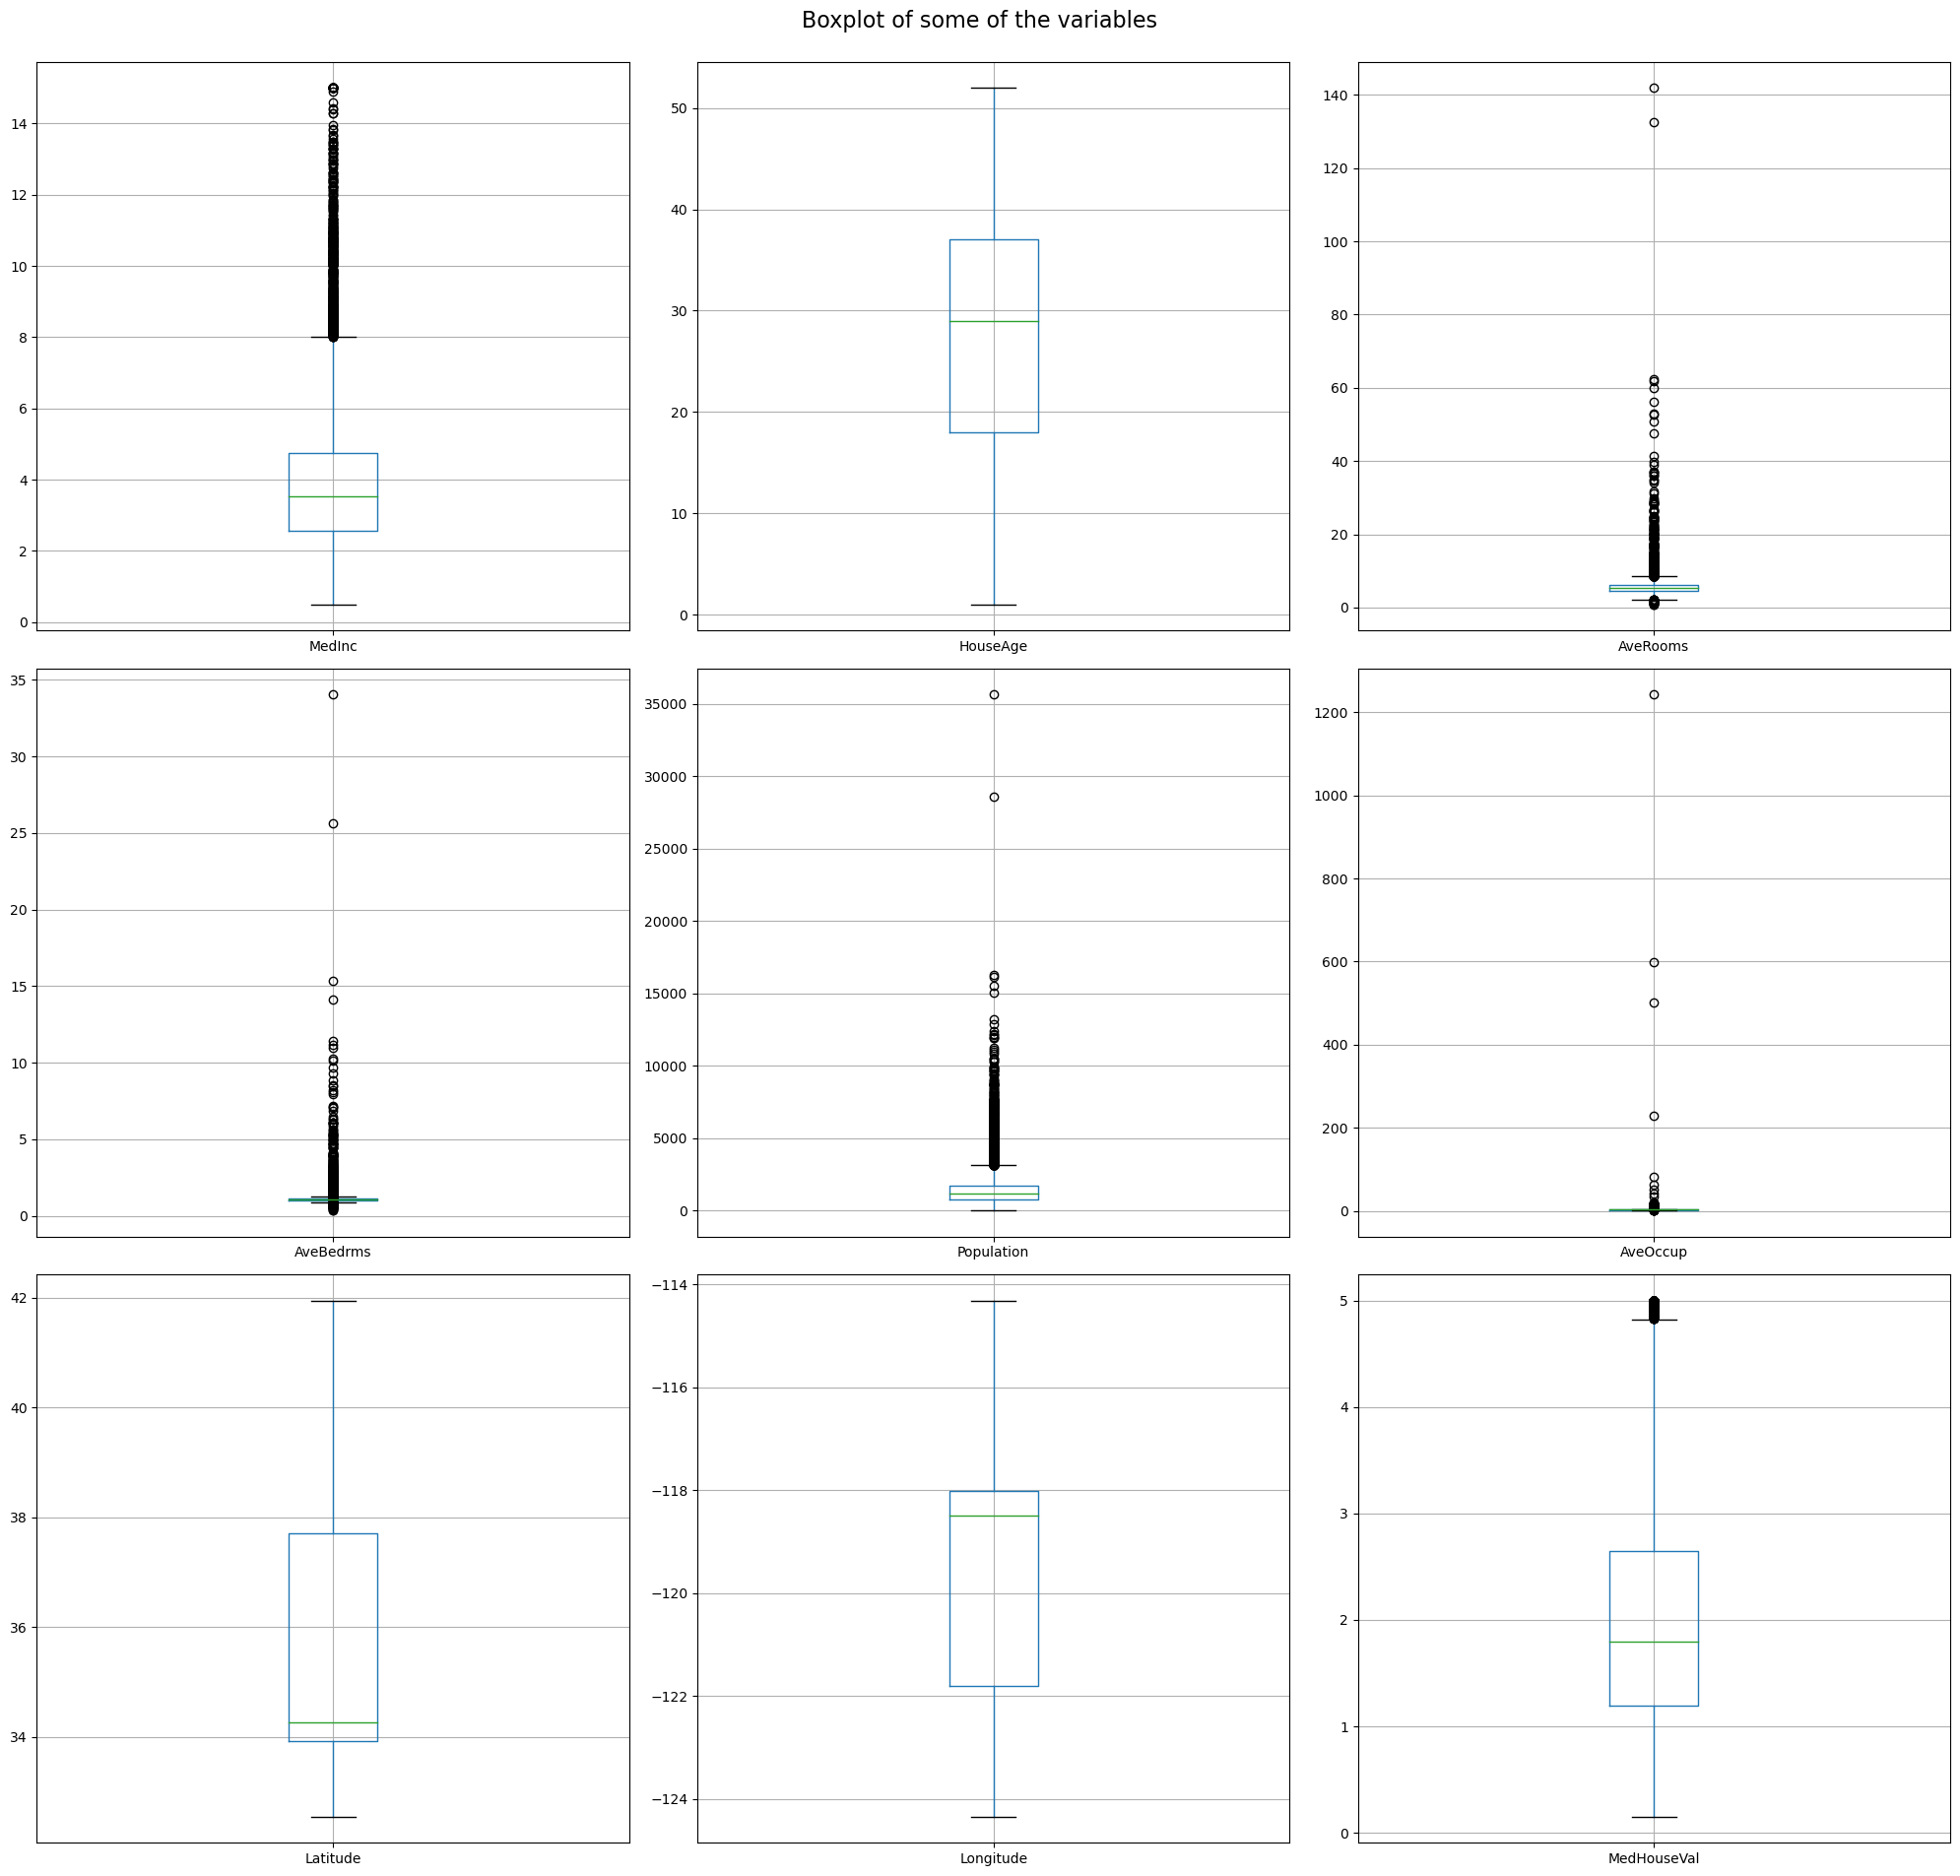

In [9]:
# Boxplot des variables

variables = df_raw.columns

fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(variables):
    df_raw.boxplot(col, ax=axs[i])
    
fig.suptitle('Boxplot of some of the variables', fontsize=16)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])

### Questions

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Commentez les graphiques ci-dessus. Que pouvez vous dire sur les valeurs extrêmes des variables "AveRooms", "Population" et "AveOccup" ? Qu'est-ce qu'un "block group" ?</p>

<p style="background-color:#AFEEEE;padding:3px">Note: Aidez-vous de la description des données obtenue plus haut. </p>

___
*Réponse:*

> Un "block group" est une unité géographique utilisée par le United States Census Bureau pour la collecte et la diffusion de données. Il s'agit de la plus petite unité pour laquelle le Census Bureau publie des données d'échantillon, et elle consiste généralement en un groupe au sein d'un seul secteur de recensement qui ont les mêmes caractéristiques de population (un "block group" a généralement une population de 600 à 3 000 personnes). Les "block groups" sont souvent utilisés pour fournir des informations plus détaillées sur des sous-groupes de population spécifiques au sein d'un secteur de recensement.
>
> On observe par `AveRooms` que la grande majorité des maisons des block groups contiennent en moyenne entre 1 et 10 pièces. Il y a par contre plusieurs block groups qui contiennent des maisons qui ont en moyenne plus de 60 pièces, ce qui semble être une valeur inattendue.
> Cependant, dans la description, il est mentionné que ces valeurs inattendues peuvent être associées à des centres de vacances qui ont une population fixe très basse.
>
> En recherchant cette entrée dans le dataset, on trouve effectivement un block group pour lequel la population est très petite (30 personnes) et donc le group consiste de beaucoup de maisons associées. Pour confirmer la théorie, en cherchant la latitude et longitude donnée dans le dataset, on tombe effectivement sur une [région touristique au sud-ouest du 'Lake Tahoe'](https://goo.gl/maps/ur72TSsEoH5gUugb8).
>
> Pour `Population` et `AveOccup` on peut faire la même observation, comme indiqué dans la description (et dans la réponse ci-dessous), un block group est en général composé de 600 à 3 000 personnes, mais on voit dans le box plot qu'il y a des groupes qui dépassent 20 000 personnes ce qui semble plutôt étonnant.
>
> Cela peut donc se rejoindre à l'observation précédente de `AveRooms`, ces block groups correspondent à des régions très spécifiques où les statistiques ne pouvaient pas être séparées en plusieurs unités. Cela peut correspondre à un village où une énumération plus spécifique des ménages n'était pas possible.
>
> Ainsi, on peut considérer ces valeurs inattendues comme aberrantes n'indiquant pas forcément une cible fiable et stable pour le reste des données.
___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.1: </b> Points obtenus: /6
</div>

Remarques: 

### 1.2 Nettoyage des données

Pour avoir un meilleur aperçu des données, nous allons supprimer quelques observations extrêmes. Pour prédire le prix d'une maison à partir de données régionales, nous pouvons exclure les éléments sortants de l'ordinaire. Si vous le souhaitez, vous pouvez réafficher différents graphiques pour voir vos nouvelles données.

In [10]:
df = df_raw[(df_raw["AveRooms"] < 10) & (df_raw["Population"] < 20000)]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Combien de lignes ont été supprimées ? </p>

(2 point)

___
*Réponse:*

> 20640 - 20411 = 229
___

**Ho non ! Le code ci-dessous affiche un magnifique graphique mais on ne comprends rien au code !**

Complétez les commentaires "# -" du code ci-dessous pour que votre assistant puisse enfin comprendre le code qu'il a copié sur [scikit-learn](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).  Aidez-vous de la documentation si nécessaire mais gardez les descriptions simples. Quelques mots suffisent, pas besoin de grande phrases.

(10 points)

In [11]:
# Initialisation d'un générateur de nombres aléatoires
rng = np.random.RandomState(0)

# Sélectionne de manière aléatoire un sous-ensemble d'échantillons de l'ensemble de données à tracer.
# 10000 indices sont choisis aléatoirement dans le DataFrame df sans remplacement (un index sera choisi qu'une seule fois).
indices = rng.choice(np.arange(df.shape[0]), 
                     size=10000,
                     replace=False)

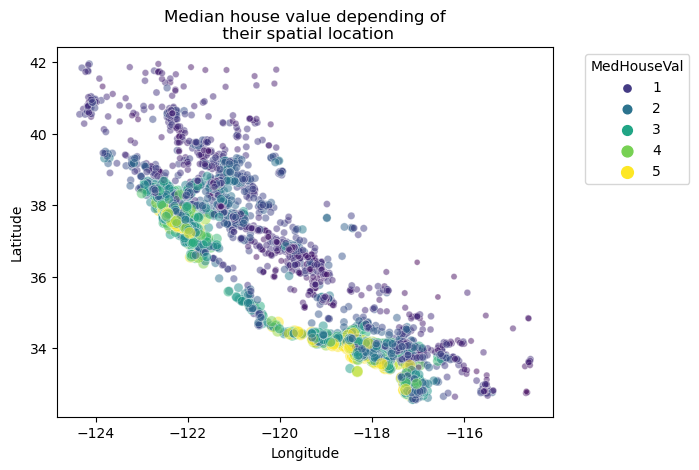

In [12]:
# Permet de créer le scatterplot
sns.scatterplot(
    data=df.iloc[indices],                         # les données du scatterplot, sous-ensemble du DataFrame df avec les indices sélectionnés ci-dessus.
    x="Longitude", y="Latitude",                   # Colonnes de "data" utilisées pour les axes x et y
    size="MedHouseVal",                            # la taille du point est déterminée par la valeur médiane de la maison
    hue="MedHouseVal",                             # la couleur du point est déterminée par la valeur médiane de la maison
    palette="viridis",                             # une palette de couleurs élégante est sélectionnée
    alpha=0.5)                                     # les points auront une transparence de 0.5 qui permet de mieux distinguer les superpositions

# ajoute une légende et un titre au graphique
# la syntaxe `_ = plt.title` à la fin du code est utilisée pour supprimer la sortie de la fonction `plt.title`, qui serait sinon imprimée sur la console.
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Si vous n'êtes pas familier avec la Californie, allez jeter un coup d'oeil sur Google maps. Que pouvez-vous observer concernant le prix median des maisons ?</p>

(2 points)

___
*Réponse:*

> On constate que les maisons les plus chères seront situées sur la côte, là où se trouvent les grandes villes de Californie : San Diego, Los Angeles, San Jose, ou San Francisco.
___

On crée maintenant un joli pairplot à l'aide de Seaborn:

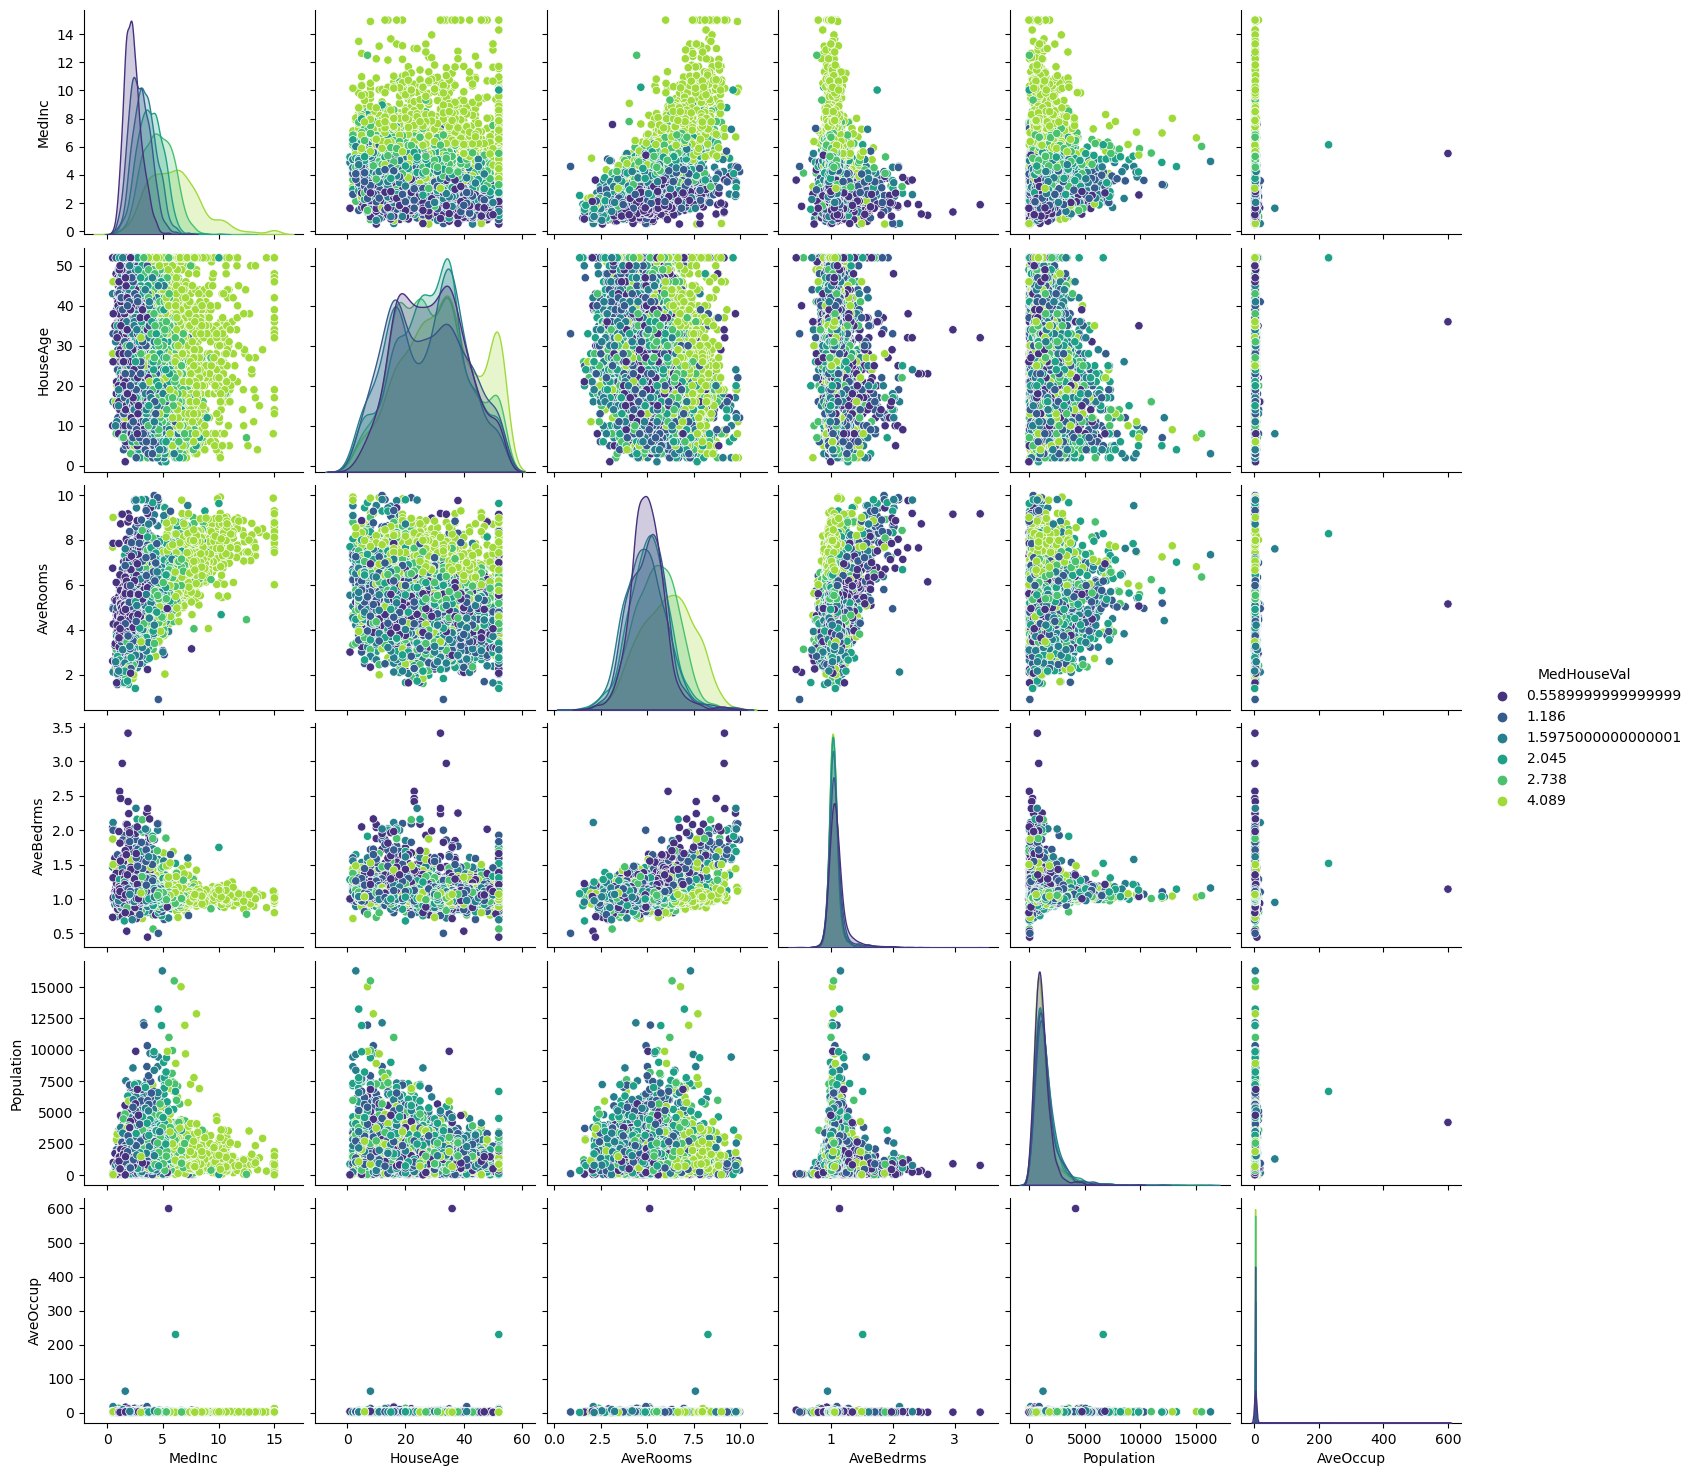

In [13]:
# Inutile de garder ces deux colonnes
columns_drop = ["Longitude", "Latitude"]
subset = df.iloc[indices].drop(columns=columns_drop)

# Ignorez ce petit passage un peu complexe, c'est pour avoir 6 couleurs pour une variable continue. 
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

### 1.3 Interprétation et analyse des graphiques

Dans la partie suivante, nous essayerons de prédire la variable MedHouseVal en fonction des autres variables, une à une. Observez les différents graphiques réalisés dans cette analyse exploratoire. 

(6 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quelles variables pourraient être de bons prédicteurs ? Ou de mauvais ? Ajouteriez-vous un ou plusieurs autre graphiques pour visualiser les données ? Justifiez vos réponses.</p>

___
*Réponse:*

> En considérant le graphique de la valeur médiane selon la position géographique, on peut très certainement considérer la `latitude` et `longitude` comme de très bons prédicteurs.
>
> On peut aussi remarquer une correlation positive entre `MedInc` et la cible selon l'histogramme dans le coin gauche, ce qui peut faciliter la prédiction.
> Cela se remarque aussi dans les pairplots suivants pour `MedInc`.
>
> Le nombre moyen de pièces et de chambres pour chaque household ne sont probablement pas de très bon prédicteurs, il y a beaucoup de bruit dans les pairplots et donc

___

<div class="alert alert-block alert-info">
<b>Corrections Ex 1.2-1.3: </b> Points obtenus: /20
</div>

Remarques: 

## Exercice 2: Régression linéaire simple

<div class="alert alert-block alert-warning">
<b>Attention: </b> la régression linéaire dans cet exercice peut prendre environ 5 minutes avec les hyper-paramètres actuels. 
</div>

Maintenant que vous êtes familiarisés avec la base de données, vous allez utiliser l'algorithme de régression linéaire simple vu en classe. 

Si vous voulez revoir comment fonctionne la régression linéaire d'une manière plus vidéastique, je vous conseille [cette vidéo de StatQuest](https://www.youtube.com/watch?v=nk2CQITm_eo) qui revoit étape par étape le fonctionnement de la régression simple et de l'ajustement d'une ligne aux données, de $ R^2 $ et de la régression multiple (en Anglais simple et clair mais quand même en 25 minutes, les premières 10 minutes suffisent). [Cette vidéo](https://www.youtube.com/watch?v=PaFPbb66DxQ) vous résume en moins de temps le concept qui va être utilisé dans le code ci-dessous: comment ajuster une ligne aux données. 


### 2.1 Complétez les commentaires

(6 points)

**Les troix méthodes ci-dessous: "*compute_MSE*", "*step_gradient*" et "*gradient_descent*" n'ont pas de commentaire d'entête.** Complétez les en indiquant ce que fait la fonction et pourquoi, ce que l'on a comme paramètres et ce qu'elle retourne. Vous pouvez vous inspirer des commentaires des fonctions d'après pour le format. 

___

*Répondre directement dans le code ci-après, entre les guillemets:*

In [14]:
def compute_MSE(b,m,data):
    """
    La fonction compute_MSE prend 3 arguments :
    b : l'ordonnée à l'origine de la droite
    m : la pente de la ligne
    data : le jeu de données

    La fonction renvoie l'erreur quadratique moyenne de la ligne.

    La fonction calcule l'erreur quadratique moyenne en parcourant en boucle l'ensemble des données.
    Pour chaque point de l'ensemble de données, elle calcule la différence entre le point et la ligne.
    Elle élève cette différence au carré et l'ajoute à l'erreur totale.
    À la fin, il divise l'erreur totale par le nombre de points dans l'ensemble de données.
    Cela nous donne l'erreur quadratique moyenne
    """
    totalError = 0
    # Mean squared error formula
    for i in range (0, len(data)):
        x = data[i, 0] # variable indépendante
        y = data[i, 1] # variable dépendante
        totalError += (y-(m*x + b)) ** 2 # somme des différences au carré
    return totalError/ float(len(data)) # on divise par N

def step_gradient(b_current, m_current, data, learning_rate):
    """
    La fonction step_gradient prend 4 arguments :
    b_current : la valeur actuelle de l'intercept de la ligne
    m_current : la valeur actuelle de la pente de la ligne
    data : le jeu de données
    learning_rate : le taux d'apprentissage

    La fonction renvoie les nouvelles valeurs de b et m.

    La fonction calcule le gradient de la ligne actuelle
    Le gradient est la direction dans laquelle la fonction d'erreur va s'approcher de son minimum
    Il calcule la dérivée partielle de la fonction d'erreur par rapport à b et m
    Il multiplie ces dérivées par le taux d'apprentissage
    Il soustrait ces valeurs de b et m
    """
    b_gradient = 0
    m_gradient = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        b_gradient += -(1/N) * (y - (m_current * x + b_current))
        m_gradient += -(1/N) * x * (y - (m_current * x + b_current))
        
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

def gradient_descent(data, starting_b, starting_m, learning_rate, num_epochs):
    """
    La fonction gradient_descent prend 5 arguments :
    data : le jeu de données
    starting_b : la valeur initiale de l'intercept de la ligne
    starting_m : la valeur initiale de la pente de la ligne
    learning_rate : le taux d'apprentissage
    num_epochs : le nombre d'itérations

    La fonction renvoie les valeurs finales de b et m.

    La fonction itère le nombre d'itérations indiqué
    Pour chaque itération, elle calcule les nouvelles valeurs de b et m en utilisant la fonction step_gradient et les
    valeurs actuelles de b et m
    """
    b = starting_b
    m = starting_m
    for i in range(num_epochs):
        b,m = step_gradient(b, m, np.array(data), learning_rate)
        #print("After {0} epochs b = {1}, m = {2}, error = {3}".format(i, b, m, compute_MSE(b, m, data)))
    return [b,m]


### 2.2 Pearson

(5 points)

Pour calculer le score $R^2$ on peut utiliser la fonction *r2_score()* fourni par scikit-learn ou l'écrire nous-même. Pour la beauté du geste, et quelques points bien sûr, **complétez la fonction ci-dessous pour calculer le coefficient $R^2$ (aussi appelé coeficient de Pearson).** 

Pour être certain que votre code fonctionne, vous pouvez exécuter la cellule de TEST qui comparera les résultats de votre méthode avec ceux de la méthode préfaite de sklearn. 



In [15]:
def pearson(y, y_pred):
    """
    La fonction pearson prend 2 arguments :
    y : Le jeu de données correctes
    y_pred : Le jeu de données prédites

    La fonction renvoie le coefficient de Pearson.

    La fonction calcule la somme du carré des erreurs résiduelles, ainsi que la
    somme du carré des erreurs. Cela permet de calculer le coefficient de Pearson
    à partir des valeurs de y et y_pred données.
    """
    numerator = ((y - y_pred) ** 2).sum()
    denominator = ((y - np.average(y)) ** 2).sum()
    return 1 - (numerator / denominator)

**Test**

Comparaison entre votre fonction et celle de scikit-learn. 

In [16]:
# TEST - Affiche un message en cas de réussite / échec de la méthode "pearson()"

y = np.random.randint(20, size=10)
y_pred = np.random.randint(20, size=10)

if (pearson(y, y_pred) == r2_score(y, y_pred)): 
    print(f"RÉUSSITE - La fonction pearson() donne le résultat attendu.")
else:
    print(f"ÉCHEC - Il semble qu'il y ait une erreur et que votre fonction ne donne pas les bons résultats.")

RÉUSSITE - La fonction pearson() donne le résultat attendu.


<div class="alert alert-block alert-info">
<b>Corrections 2.1 - 2.2: </b> Points obtenus: /11
</div>

Remarques: 

### 2.3 Exécution du code vu en cours

Le code ci-dessous est simplement un joli packaging  du code vu en cours. 

In [17]:


def score_simple_linear_regression(df: pd.DataFrame, var: str, lr: float, n_epochs: int, label: str = 'MedHouseVal', n_repetitions: int = 100) -> tuple:
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the California dataset.
    var : str
        Variable to use as feature.
    label : str, default 'MedHouseVal'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
        
    Returns
    -------
    Tuple
        (Mean score, list of labels, list of predictions, best m, best b)
    """
    scores = []
    labels = []
    predictions = []
    
    data = df[[var, label]].values
    
    ms = []
    bs = []
    
    for _ in range(n_repetitions):
        train, test = train_test_split(data, test_size=0.2)
        # Initialize m and b.
        initial_b = np.random.rand(1) # intercept
        initial_m = np.random.rand(1) # pente
        
        # Step 4: gradient descent
        [b, m] = gradient_descent(train, initial_b, initial_m, lr, n_epochs)
        preds = test[:, 0] * m + b
        lbls = [test[i, 1] for i in range(len(test))]
        ms.append(m)
        bs.append(b)
        
        # Inversez le commentaire ci-dessous pour utiliser la méthode de sklearn.
        #scores.append(r2_score(lbls, preds))
        scores.append(pearson(lbls, preds))
        
        labels += lbls
        predictions += list(preds)
    
    best_idx = scores.index(max(scores))
    
    return np.mean(scores), labels, predictions, ms[best_idx], bs[best_idx]

def plot_regression_line(data: np.ndarray, x_name: str, y_name: str, m: float, b: float, title: str) -> plt.axes:
    """
    Plot the regression line usimg the given `m` and `b`.
    
    Parameters
    ----------
    data : np.ndarray
        Data with the variable and the label to plot. 
        Label must be in the last column.
    x_name : str
        Name of the column for x.
    y_name : str
        Name of the column for y.
    m : float
        m value to use for the predictions.
    b : float
        b value to use for the predictions.
    title : str
        Title of the plot.
        
    Returns
    -------
    plt.axes
        Matplotlib ax. 
    """
    fig, ax = plt.subplots(figsize=(15, 9))
    data.plot.scatter(x=x_name, y=y_name, ax=ax, title=title)
    y_pred = m * data[x_name] + b
    ax.plot(data[x_name].values, y_pred, 'r')
    ax.text(0.025, 0.925,
            f'$R^2={np.round(r2_score(data[y_name].values, y_pred), 3)}$',
            fontsize=12, transform=ax.transAxes)
    return ax

Si vous n'avez pas réussi à écrire une fonction **pearson()**, (de)commentez les lignes indiquées dans la fonction "*score_simple_linear_regression()*" ci-dessus afin d'utiliser la méthode de sklearn. 


Comme vu dans le labo précédent, il vaut souvent mieux normaliser/standardiser les données (moyenne nulle et écart-type à 1). Ça n'est pas toujours le cas et ça peut être discutable. Ici nous allons normaliser les variables indépendantes que nous voulons utiliser pour la régression linéaire simple. 

*Tip: n'oubliez pas que vous pouvez développer ou réduire la sortie de l'exécution d'une cellule en cliquant sur la gauche de la cellule. Comme la sortie de la cellule suivante est relativement longue, la réduire pour ne pas scroller pendant trop longtemps peut être utile!*



Variables testées pour la régression linéaire simple: ['MedInc', 'AveRooms', 'Population']
Variable MedInc
Learning rate: 0.5


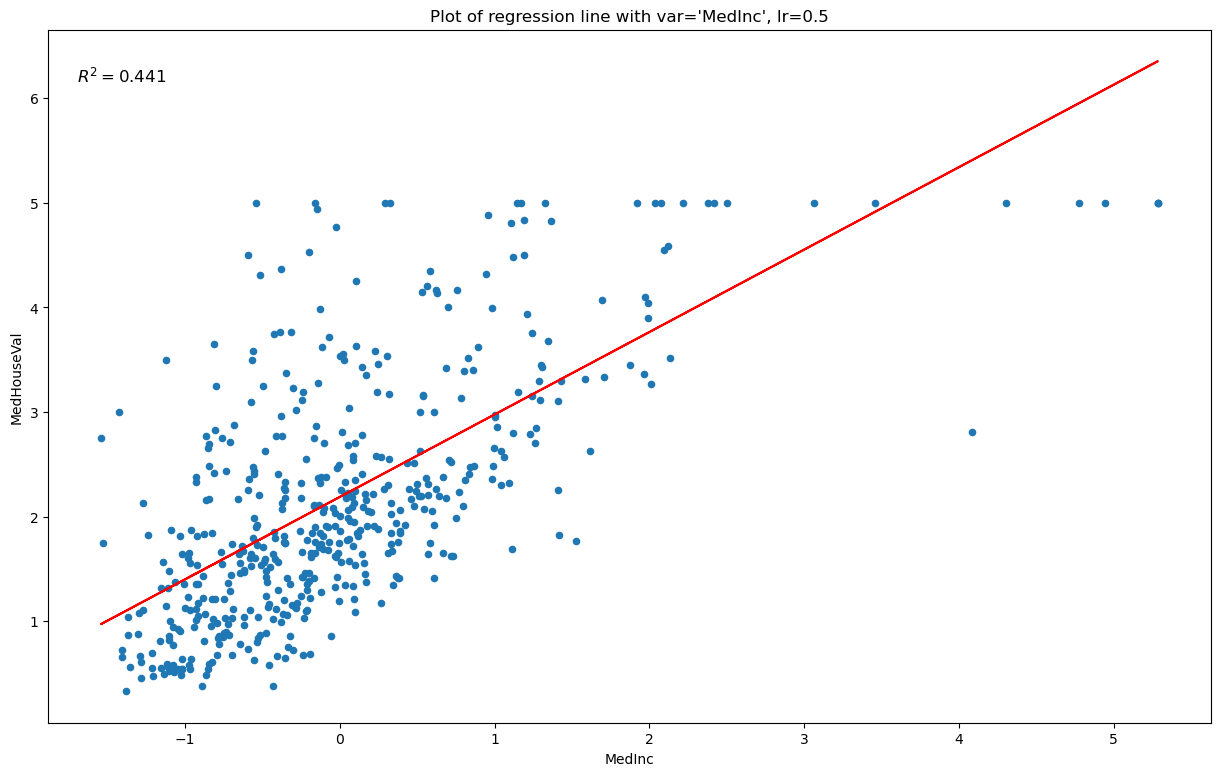

Learning rate: 0.1


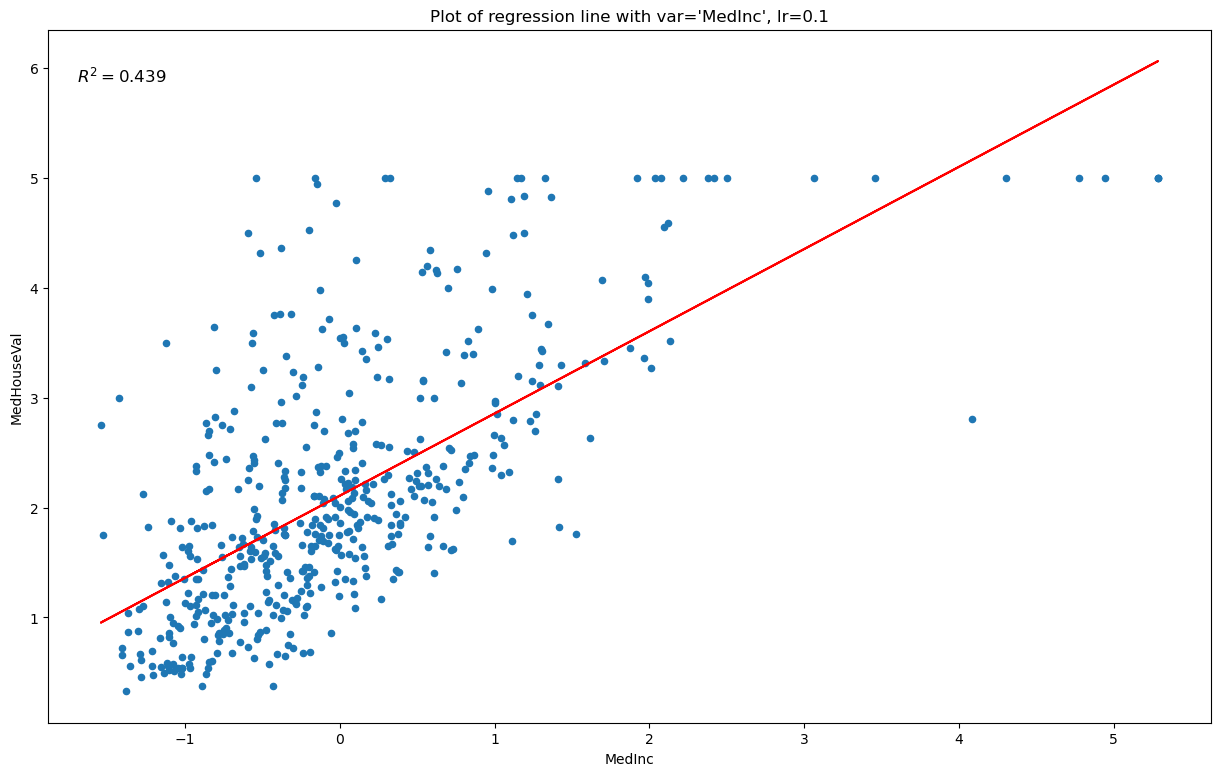

Learning rate: 0.01


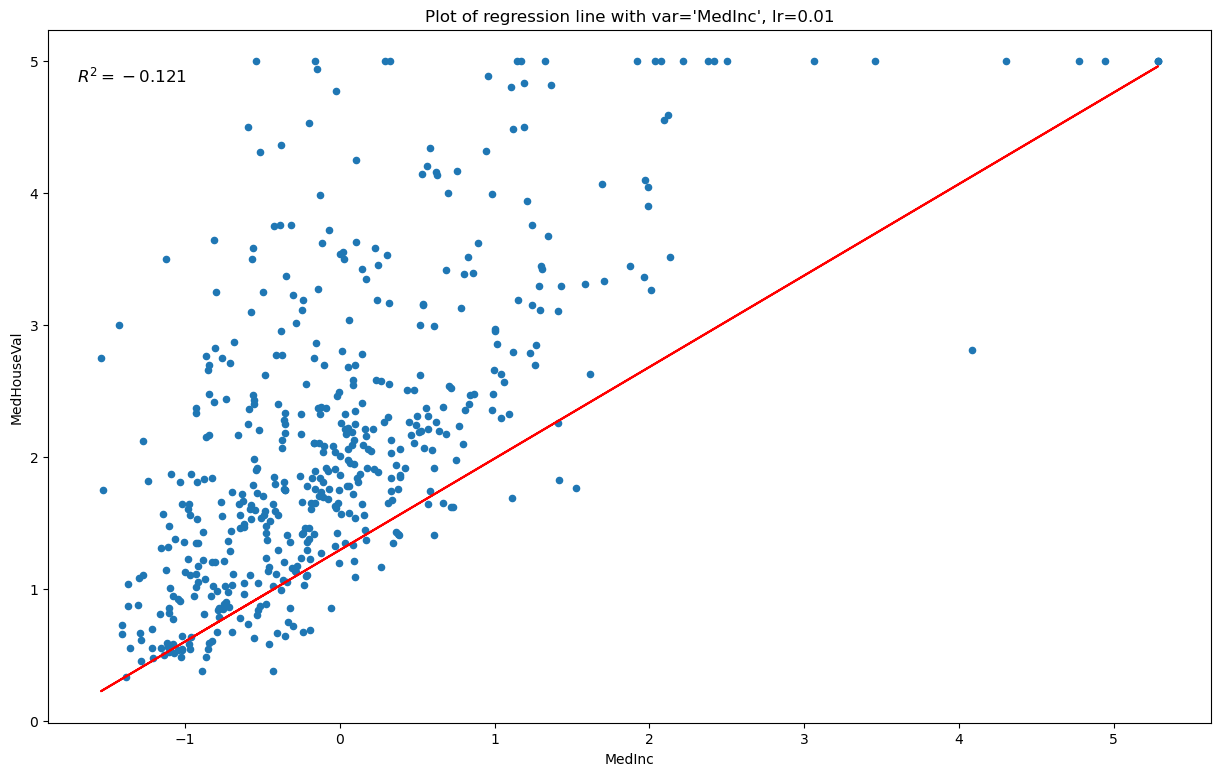

Learning rate: 0.001


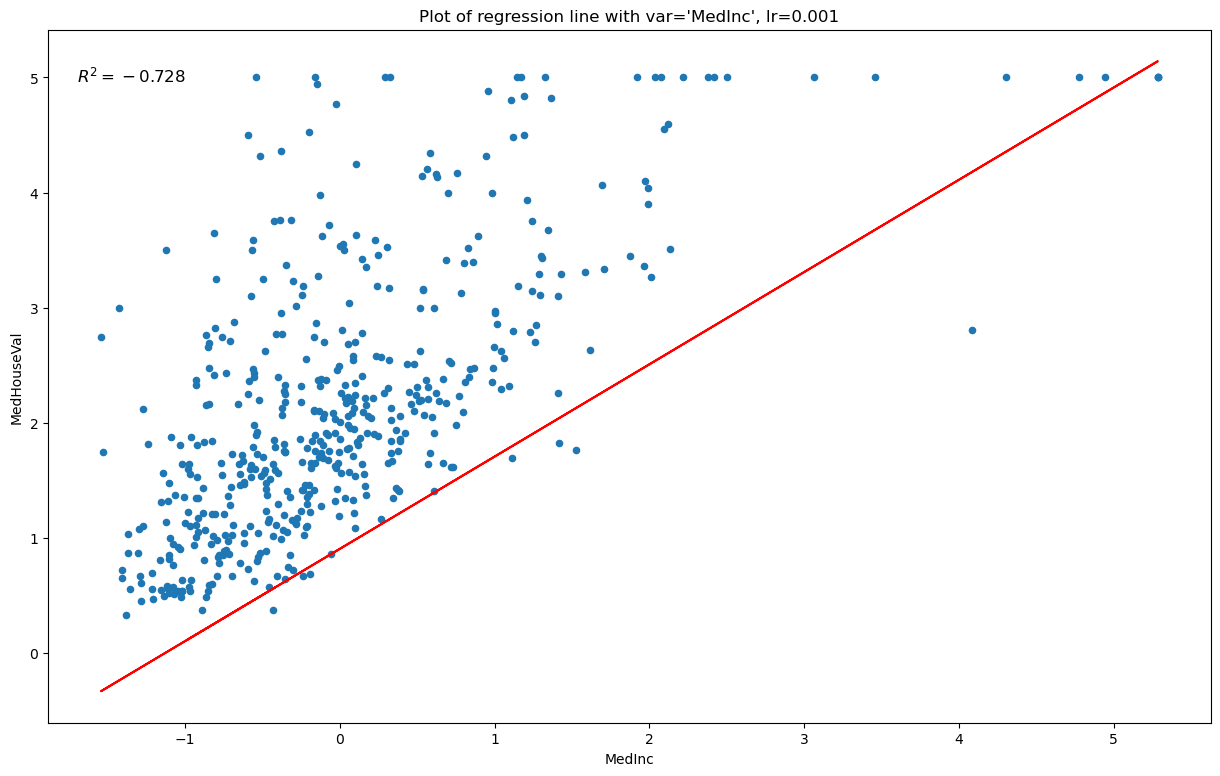

Variable AveRooms
Learning rate: 0.5


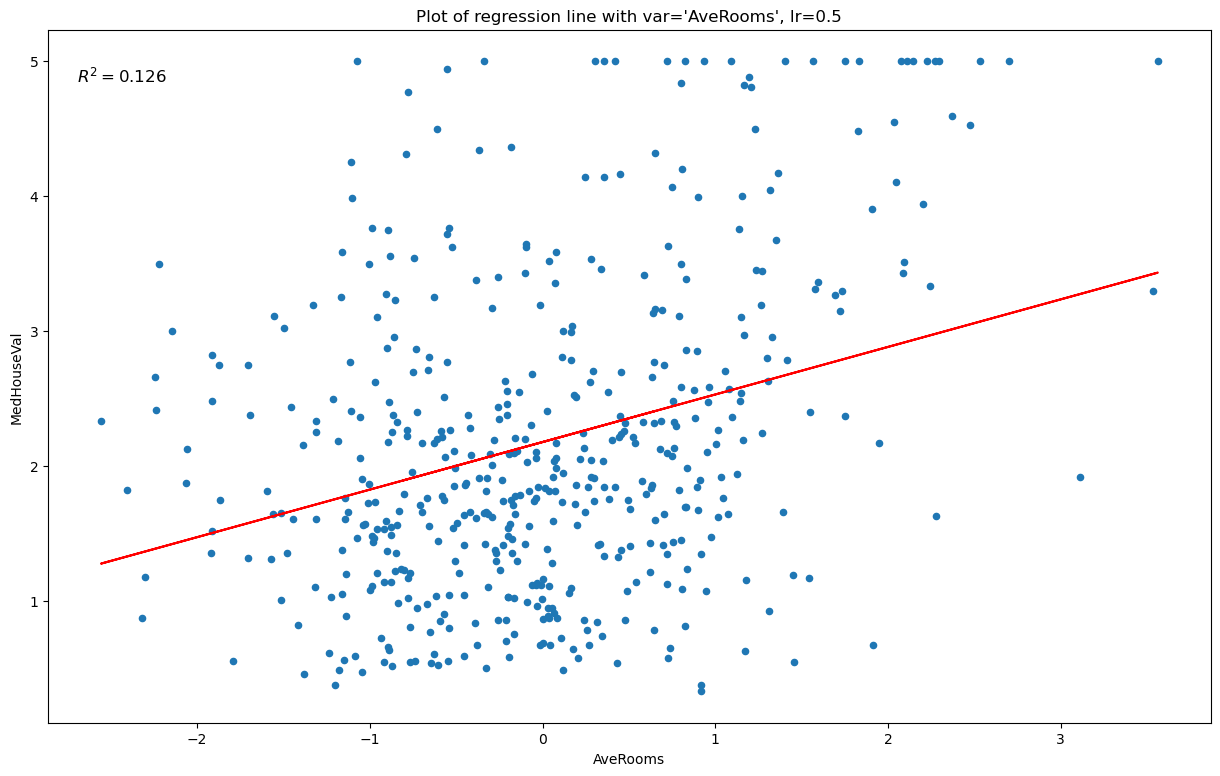

Learning rate: 0.1


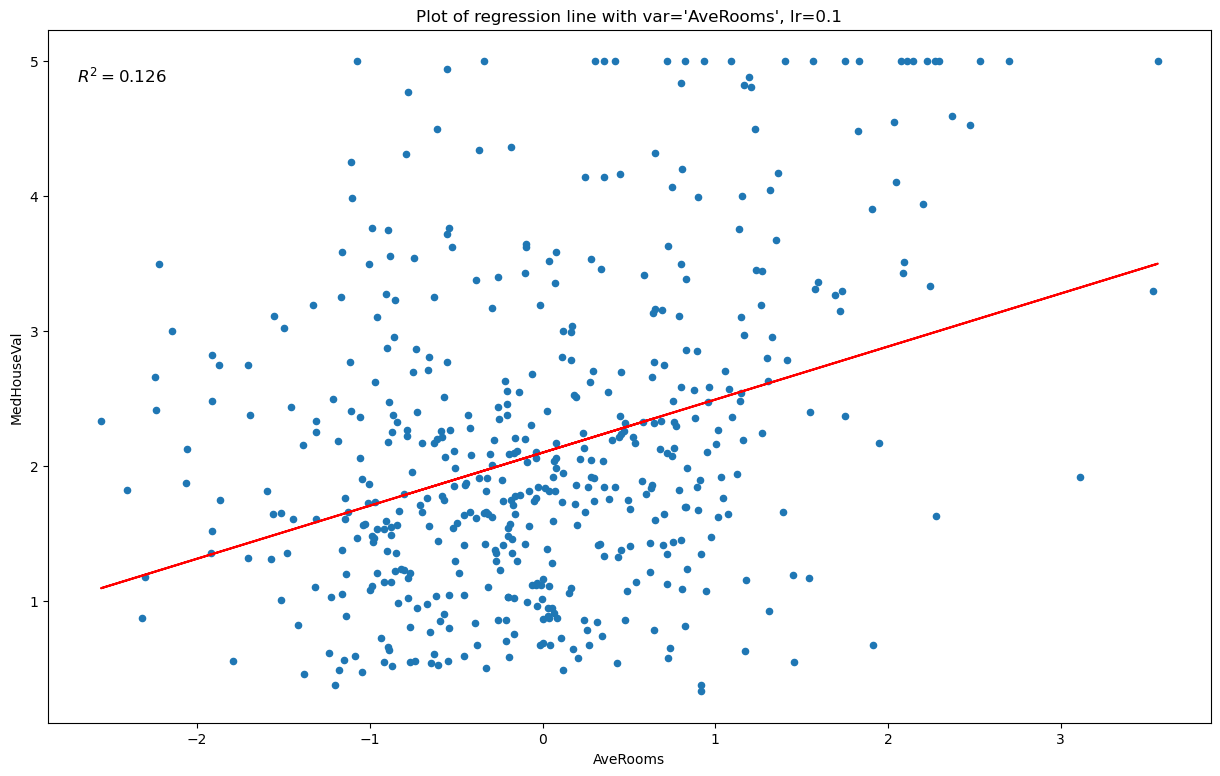

Learning rate: 0.01


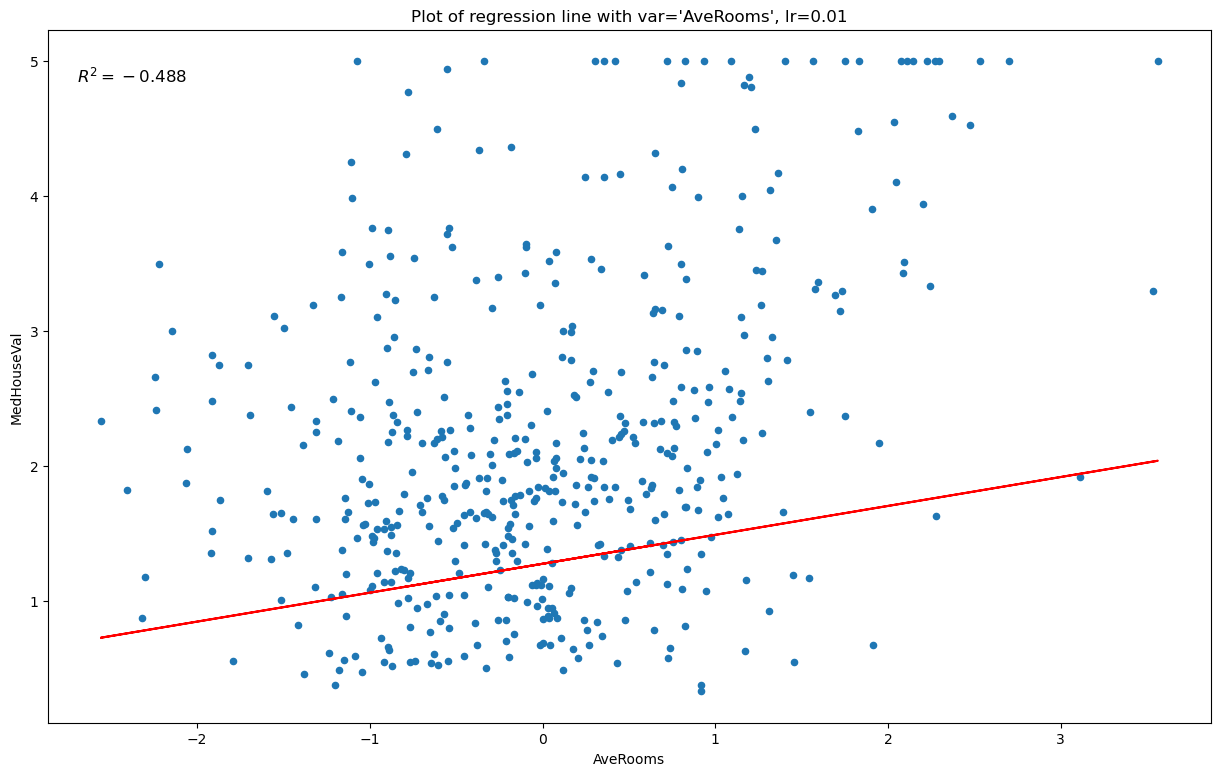

Learning rate: 0.001


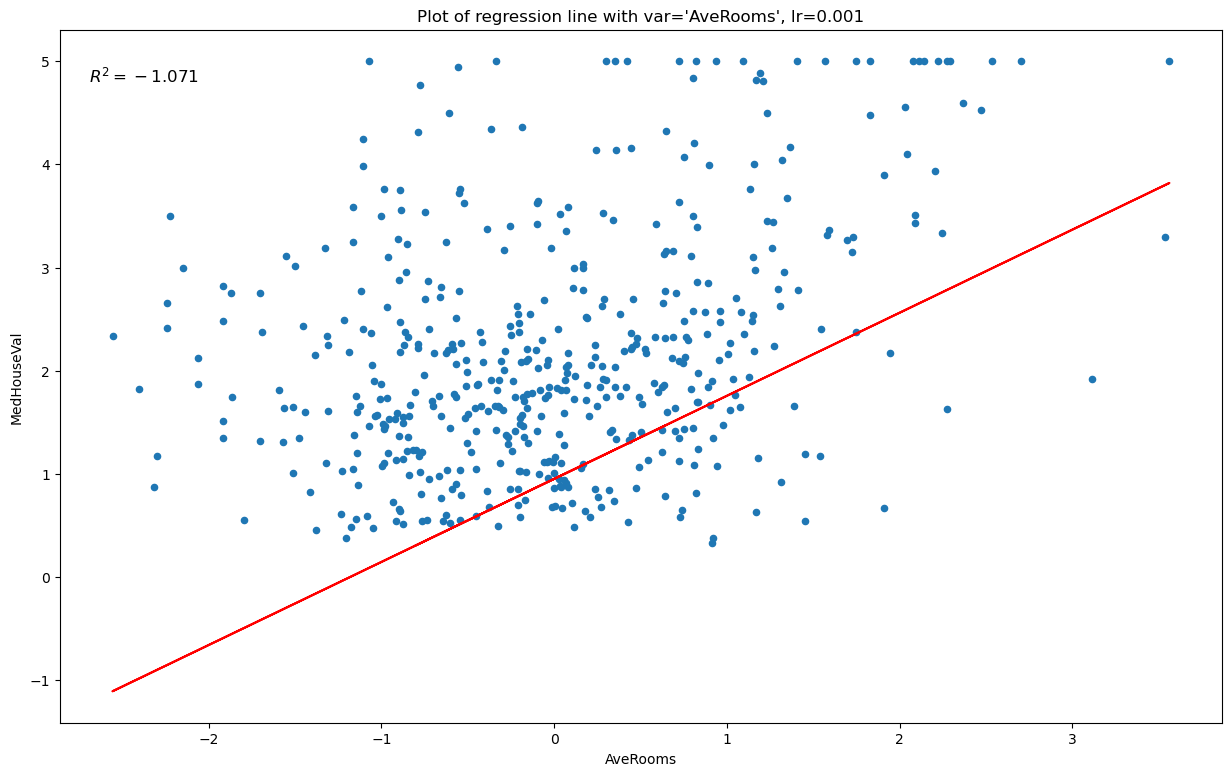

Variable Population
Learning rate: 0.5


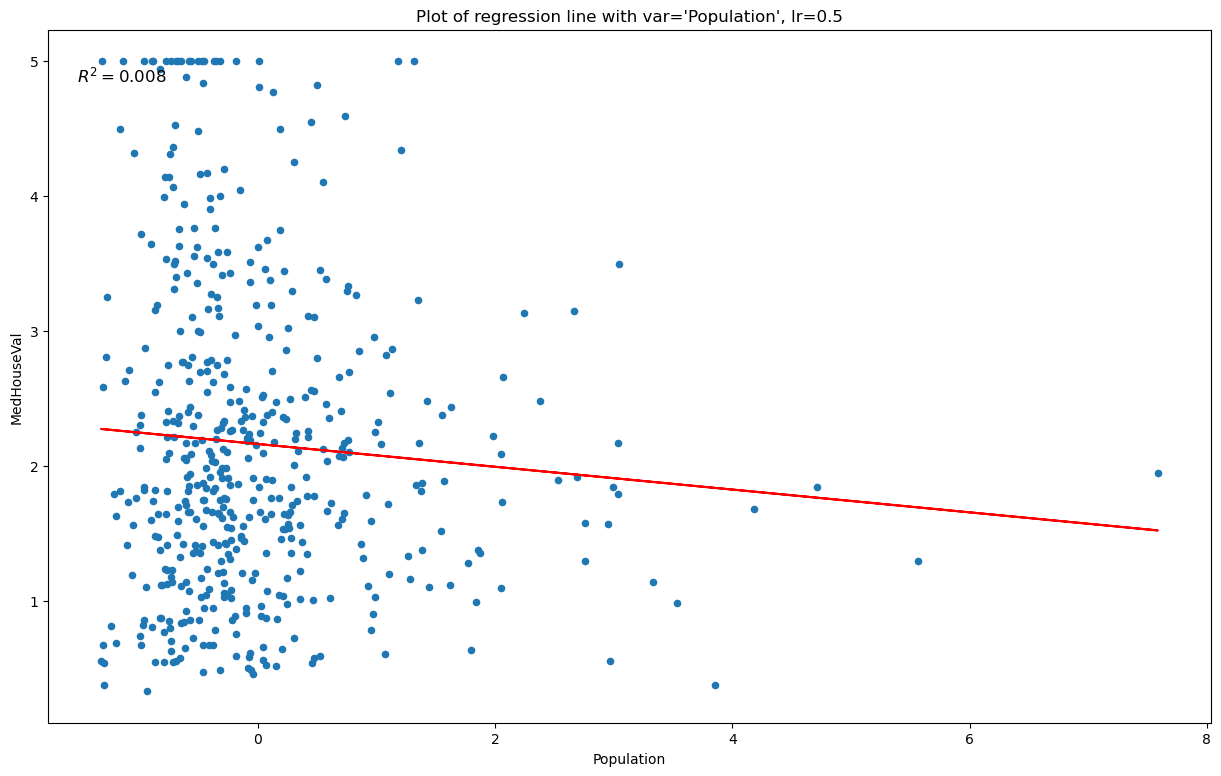

Learning rate: 0.1


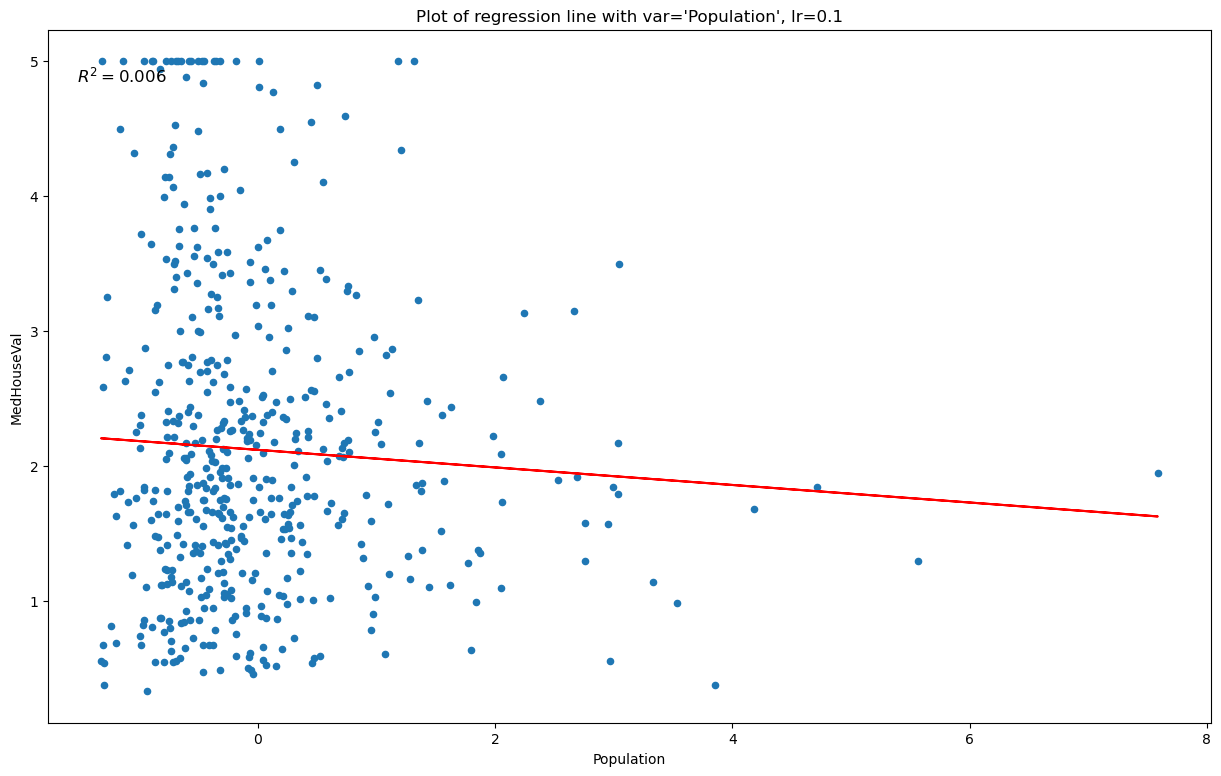

Learning rate: 0.01


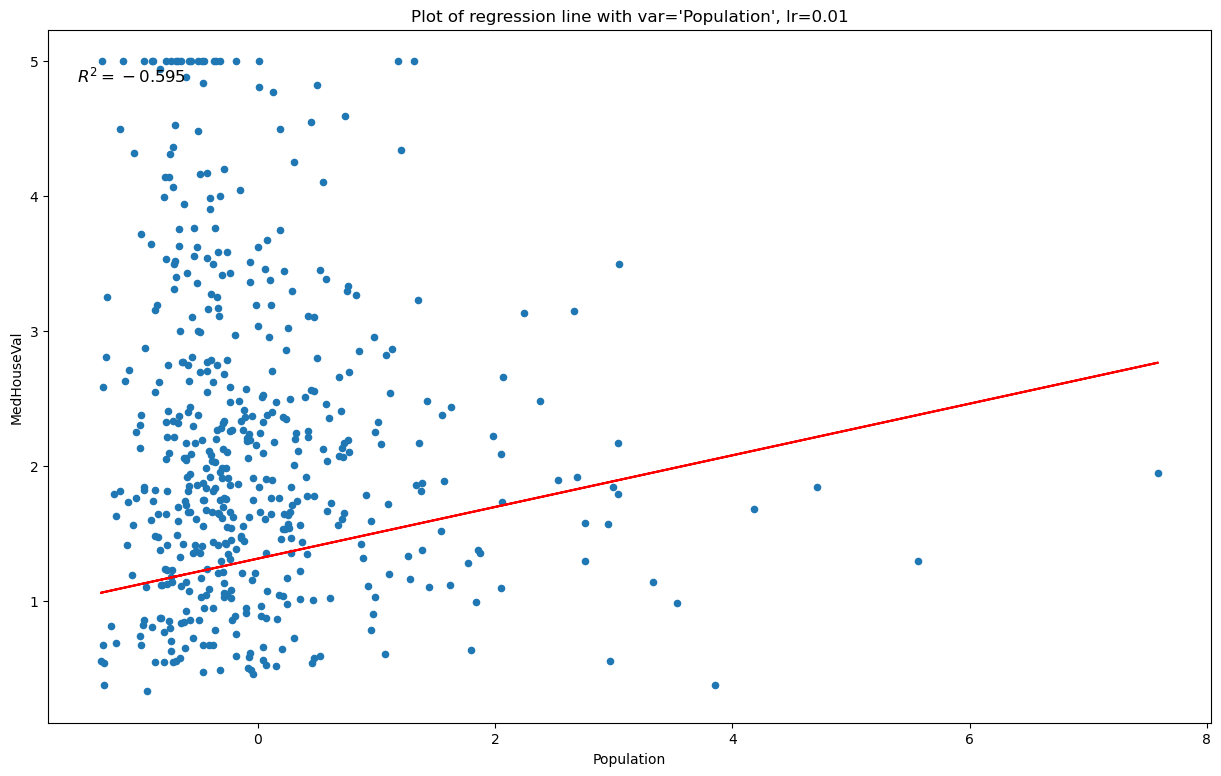

Learning rate: 0.001


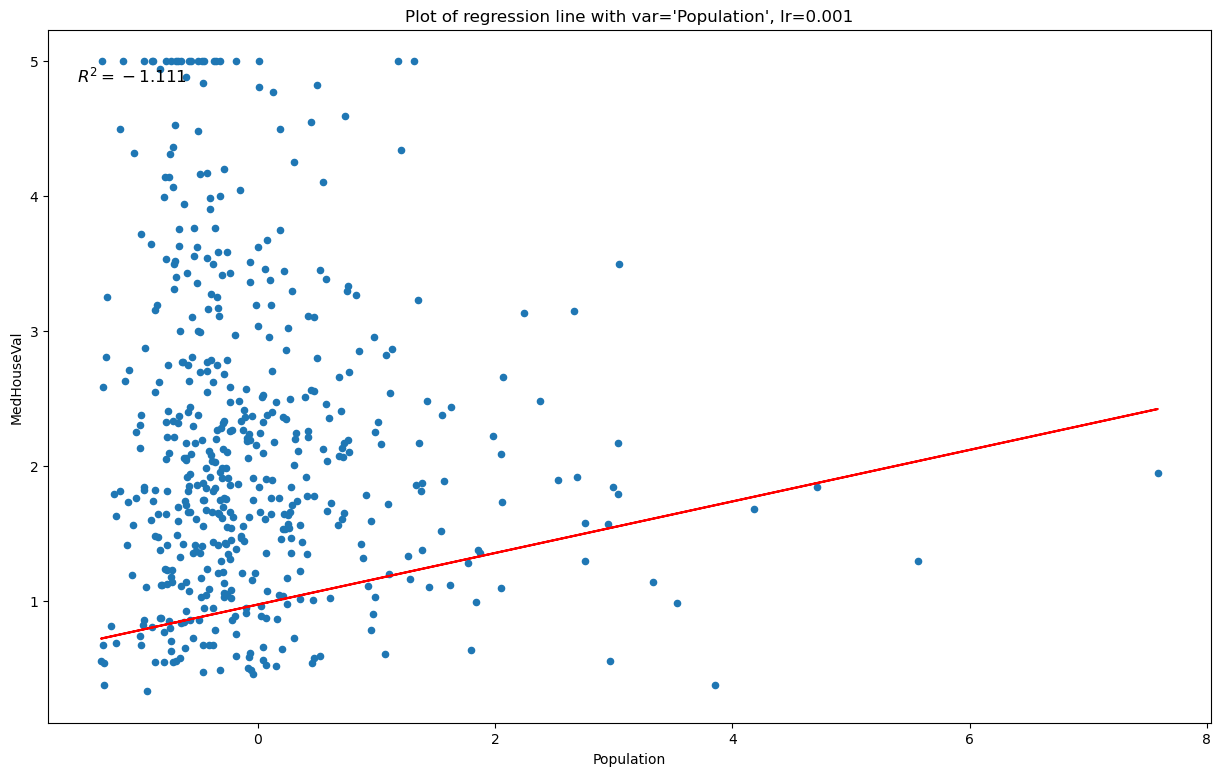

Exécution: 159.08633637428284 secondes


In [18]:
import time

# Mesure du temps au début
start = time.time()


# On va prendre un subset du dataframe, avec sa taille on en aurait pour 1h de calcul à chaque fois.
indices = rng.choice(np.arange(df.shape[0]), 
                     size=500,
                     replace=False)
subset_df = df.iloc[indices]

# Standardisation

# Copie de l'échantillon et normalisation des colonnes choisies (toutes sauf MedHouseVal)
df_normalized = subset_df.copy()
cols = subset_df.columns[df.columns != 'MedHouseVal']
scaler = StandardScaler()

df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

variables = ['MedInc',
             'AveRooms',
             'Population']


print(f"Variables testées pour la régression linéaire simple: {variables}") 
label = 'MedHouseVal'

learning_rates = [0.5, 0.1, 0.01, 0.001]
n_epochs = 30
scores = {}

for var in variables:
    print(f"Variable {var}")
    scores[var] = {}
    for lr in learning_rates:
        print(f"Learning rate: {lr}")
        score, _, _, m, b = score_simple_linear_regression(df_normalized, var, lr, n_epochs, label=label)
        scores[var][lr] = score
        plot_regression_line(df_normalized, var, 'MedHouseVal', m, b, f'Plot of regression line with {var=}, {lr=}')
        plt.show()

end = time.time()
print(f"Exécution: {end - start} secondes")

### 2.4 Question

(5 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quel est le meilleur score que vous obtenez et que signifie-t-il (qu'est-ce que $R^2$) ?</p>

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>  Quels sont les risques en choisissant un learning rate trop petit ou trop grand ?</p>


___

*Réponse:*

> On cherche la variable et le learning rate qui ont donné le meilleur coefficient $R^2$ (le plus proche possible de 1.0).
> La variable `MedInc` avec les learning rates 0.5 et 0.1 ont les deux donnés un coefficient similaire qui est largement plus grand que les coefficients des autres régressions.
>
> Le coefficient $R^2$ est, dans notre cas, une mesure de la capacité du modèle à prédire la variable cible sur la base des variables d'entrée. Un score $R^2$ de 1,0 indique que le modèle est capable de prédire parfaitement la variable cible, tandis qu'un score $R^2$ de 0,0 (ou même négatif) indique que le modèle n'est pas du tout capable de prédire la variable cible. Ainsi, un score $R^2$ élevé indique que les prédictions du modèle sont susceptibles d'être exactes, tandis qu'un score $R^2$ faible indique que les prédictions du modèle sont moins susceptibles d'être exactes. Cependant, il est important de noter que le score $R^2$ n'est pas une mesure parfaite de la précision d'un modèle, et que d'autres facteurs (tels que la qualité des données d'apprentissage) peuvent également affecter la capacité du modèle à faire des prédictions précises.
>
> On notera pour ce point que le $R^2$ pour le learning rate à 0.001 de `MedInc` est négatif (-0.728). Un score négatif peut se produire lorsque les prédictions du modèle sont pires que la simple utilisation de la moyenne de la variable cible comme prédicteur. En d'autres termes, le modèle n'est pas en mesure de capturer une partie de la variation de la variable cible, et fait en fait des prédictions qui sont pires que des suppositions aléatoires. Cela peut se produire si le modèle s'adapte trop aux données d'apprentissage, ou si les variables d'entrée ne sont pas pertinentes pour prédire la variable cible. Dans tous les cas, un score $R^2$ négatif indique que le modèle n'est pas performant et doit être amélioré. On peut alors estimer en comparant avec le score obtenu pour le learning rate à 0.1 que le learning rate était trop bas.
>
> Les variables `AveRooms` et `Population` ont plus de mal à former un modèle au score $R^2$ plus élevé. Notre analyse basique du dataset au point 1 confirme ce point, on pouvait en effet observer beaucoup de bruit dans le dataset et pas de correlation aussi pertinente que celle pour `MedInc` pour une classification par rapport à valeur médiane du logement. Cela se montre aussi avec les coefficients $R^2$ souvent plus petits ou égaux à 0.1, pour tous les learning rates.
>
> Ainsi, si le taux d'apprentissage est trop faible, l'apprentissage du modèle prendra beaucoup de temps pour converger. D'autre part, si le taux d'apprentissage est trop élevé, l'apprentissage du modèle peut ne pas converger du tout ou converger vers une solution non optimale. Dans les deux cas, les performances du modèle sur les données d'apprentissage peuvent être médiocres.



___

<div class="alert alert-block alert-info">
<b>Corrections 2.4: </b> Points obtenus: /2
</div>

Remarques: 

___
___

## Exercice 3: Régression linéaire multiple



Lorsqu'on utilise plus d'une variable pour la régression, il est important d'avoir une idée de la [corrélation](https://en.wikipedia.org/wiki/Correlation) entre lesdites variables. Ci-dessous, on affiche la matrice de corrélation qui montre pour chaque variable, à quel point elle est corrélée avec les autres. On veut éviter de prendre deux variables corrélées entre elles car cela peut poser des problèmes (sujet pas abordé ici). 

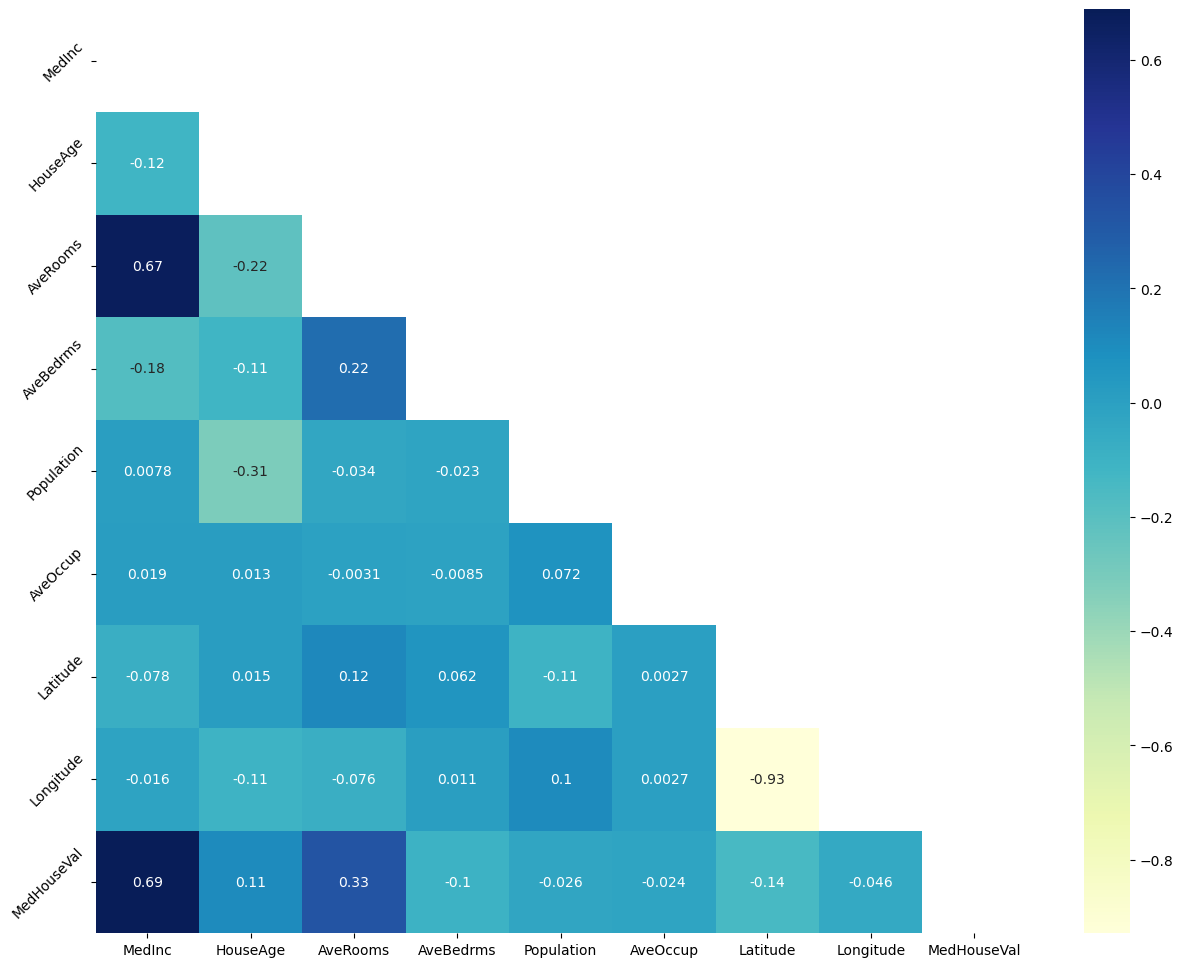

In [19]:
# Heatmap de la matrice de corrélation.

# Masque pour la partie supérieure de la matrice, qui est symétrique. 
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Figure et plot
fig, ax = plt.subplots(figsize=(15,12)) 
dataplot = sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True)
plt.yticks(rotation=45) 
plt.show()

### 3.1 Question

(3 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles variables sont fortement ($> 0.1$) corrélées entre elles ? Est-ce que ces corrélations ont toutes un sens ? Développez.</p>

___



*Réponse:*

> 1. Le revenu moyen est fortement corrélé à la médiane des valeurs des logements.
> 2. Le revenu moyen est fortement corrélé au nombre moyen de pièces des logements.
> 3. L'age de la maison est corrélé à la médiane des valeurs des logements.
> 4. Le nombre moyen de chambres à coucher est corrélé au nombre moyen de pièces des logements.
> 5. Le nombre moyen de pièces des logements est corrélé à la médiane des valeurs de ceux-ci, mais ce n'est pas le cas pour les chambres à coucher.
> 6. La latitude est corrélée au nombre moyen de pièces du logement.
> 7. La longitude est corrélée à la population totale des logements.

---

> 1. Il n'est pas surprenant qu'il existe une forte corrélation entre le revenu médian d'une région et la valeur médiane des maisons dans cette région. Cela s'explique par le fait que les personnes ayant des revenus plus élevés sont généralement en mesure de s'offrir des maisons plus chères, de sorte que les zones ayant des revenus médians plus élevés ont tendance à avoir une valeur médiane des maisons plus élevée.
>
> 2. Il n'est pas rare qu'il y ait une forte corrélation entre le revenu médian d'une région et le nombre moyen de pièces dans les maisons de cette région. Cela s'inscrit dans la continuité de la correlation 1, une maison plus grande et plus chère contient en général plus de pièces. En outre, le type de logement disponible dans une région peut également influencer le nombre moyen de pièces dans les maisons. Par exemple, si une région est connue pour ses maisons luxueuses et haut de gamme, le nombre moyen de pièces dans les maisons de cette région sera probablement plus élevé que dans une région où les maisons plus modestes sont la norme.
>
> 3. La relation entre l'âge d'une maison et sa valeur médiane peut être complexe et est susceptible de varier en fonction d'un certain nombre de facteurs. En général, les maisons plus anciennes peuvent avoir moins de valeur que les maisons plus récentes car elles peuvent nécessiter plus d'entretien et de mises à jour. Cependant, dans certains cas, les maisons plus anciennes peuvent avoir plus de valeur que les maisons plus récentes. Par exemple, si une maison ancienne est bien entretenue et a une signification historique ou architecturale, elle peut être considérée comme ayant plus de valeur qu'une maison plus récente sans ces caractéristiques. En outre, l'emplacement et le marché immobilier global peuvent également influencer la relation entre l'âge d'une maison et sa valeur. Cette corrélation est par conséquent difficile à expliquer et n'as pas forcément beaucoup de sens.
> 
> 4. En général, il est logique qu'il y ait une petite corrélation entre le nombre moyen de chambres à coucher et le nombre moyen de pièces dans les maisons d'une région donnée. Comme mentionné précédemment, le nombre de chambres à coucher dans une maison est souvent une bonne indication de la taille globale de la maison, mais il ne donne pas une image complète de la taille ou de la valeur de la maison. En outre, le nombre de pièces d'une maison peut inclure des pièces qui ne sont pas des chambres à coucher, telles que des salles de bains, des bureaux et des pièces de rangement, ce qui peut également affecter la relation entre le nombre de chambres à coucher et le nombre de pièces d'une maison. Dans l'ensemble, il est important de tenir compte d'une série de facteurs pour évaluer la relation entre le nombre de chambres à coucher et le nombre de pièces d'une maison, plutôt que de se fier uniquement à cette relation.
>
> 5. Il n'est pas rare qu'il y ait une corrélation plus forte entre le nombre de pièces d'une maison et la valeur médiane de celle-ci qu'entre le nombre de chambres à coucher et la valeur médiane de la maison. Cela s'explique par le fait que le nombre de pièces d'une maison peut fournir plus d'informations sur la taille et la valeur de la maison que le seul nombre de chambres. Par exemple, une maison comportant de nombreuses pièces peut avoir un grand salon, une salle à manger et une salle familiale en plus de plusieurs chambres à coucher, ce qui lui donne plus de valeur qu'une maison comportant un nombre similaire de chambres à coucher mais moins de pièces.
>
> 6. Il est possible que la corrélation entre la latitude d'une région et le nombre moyen de pièces dans les maisons de cette région soit une coïncidence, mais il est également possible que des facteurs sous-jacents expliquent cette relation. Le climat et la géographie d'une région peuvent influencer le type de logement disponible et souhaitable dans cette région. Par exemple, dans les régions au climat chaud, les maisons sont souvent conçues pour tirer parti du climat, ce qui peut se traduire par des plans d'étage plus ouverts et spacieux et un nombre moyen de pièces plus élevé. À l'inverse, dans les régions au climat plus froid, les maisons peuvent être conçues pour être plus compactes et économes en énergie, ce qui peut se traduire par un nombre moyen de pièces plus faible. En outre, la densité de population d'une région peut également affecter le nombre moyen de pièces dans les maisons, ce qui peut également varier en fonction de la latitude. 
>
> 7. Il n'est pas rare qu'il y ait une corrélation entre la longitude d'une zone et la densité de population de cette zone. En effet, la géographie d'une zone peut influencer la densité de population et le type de logement disponible dans cette zone. En Californie, le littoral est souvent un endroit souhaitable pour les logements, et les zones proches du littoral sont susceptibles d'avoir une densité de population plus élevée que les zones intérieures. Néanmoins, la densité de population d'une région peut également être influencée par d'autres facteurs, tels que la disponibilité des emplois, la qualité des écoles et des autres commodités, et le coût global de la vie. Cette corrélation a du sens, mais elle peut aussi être associée à d'autres facteurs qui ne sont pas recensés dans le dataset.


___

### 3.2 Régression

Exécutez les cellules ci-dessous.



In [29]:
# Version sklearn

def score_linear_regression(df: pd.DataFrame, *var: str, label: str = 'MedHouseVal', n_repetitions: int = 100):
    """
    Train a model `n_repetitions` time and return the average score.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with the boston dataset.
    var : Tuple of str
        Tuple with the variables to use as feature.
    label : str, default 'MEDV'
        Label to use.
    n_repetitions : int, default = 100
        Number of repetitions for the training. 
    """
    scores = []
    labels = []
    predictions = []
    
    for _ in range(n_repetitions):
        regressor = LinearRegression()
        X_train, X_test, y_train, y_test = train_test_split(df[list(var)], df[label], test_size=0.2)
        regressor.fit(X_train, y_train)
        labels.append(y_test)
        predictions.append(regressor.predict(X_test))
        scores.append(regressor.score(X_test, y_test))
    return np.mean(scores), labels, predictions

On choisit ensuite les groupes de variables non-corrélées entre elles que nous allons tester.


In [30]:

combos = [['Latitude', 'Longitude'], 
          ['AveRooms', 'Population', 'MedInc'],
          ['AveRooms', 'Population'], 
          ['AveRooms', 'MedInc'], 
          ['Population', 'MedInc']]

label = 'MedHouseVal'


Puis nous réalisons la régression linéaire multiple avec chaque groupe en utilisant notre fonction créée ci-dessus. 

In [31]:
for variables in combos:
    print(f'Model using {variables}')
    score, y_true, y_pred = score_linear_regression(df_normalized, *variables, label=label)
    print(f'Score={score}')

Model using ['Latitude', 'Longitude']
Score=0.20753629571229448
Model using ['AveRooms', 'Population', 'MedInc']
Score=0.4483404179997402
Model using ['AveRooms', 'Population']
Score=0.10609459678955253
Model using ['AveRooms', 'MedInc']
Score=0.4342047257931114
Model using ['Population', 'MedInc']
Score=0.42170631940731673


### Questions

(2 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Cela prend-il beaucoup de temps en comparaison avec notre fonction "maison" pour la régression linéaire simple ?</p>



*Réponse:*

> La régression linéaire de sklearn prend en effet beaucoup moins de temps que la version "maison".

___

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quel groupe de variables permet de prédire au mieux la variable dépendante ? Quels résultats obtenez-vous ?</p>

*Réponse:*

> Le groupe `['AveRooms', 'MedInc']` permet de mieux prédire la variable dépendante, avec un score $R^2$ le plus élevé (0.44)
> 
> Les groupes de variables `['Population', 'MedInc']` et `['AveRooms', 'Population', 'MedInc']` ont aussi un score similaire.

___

<div class="alert alert-block alert-info">
<b>Corrections 3: </b> Points obtenus: /5
</div>

Remarques: 

Si vous faites ce labo avant les fêtes, exécutez la cellule ci-dessous. 

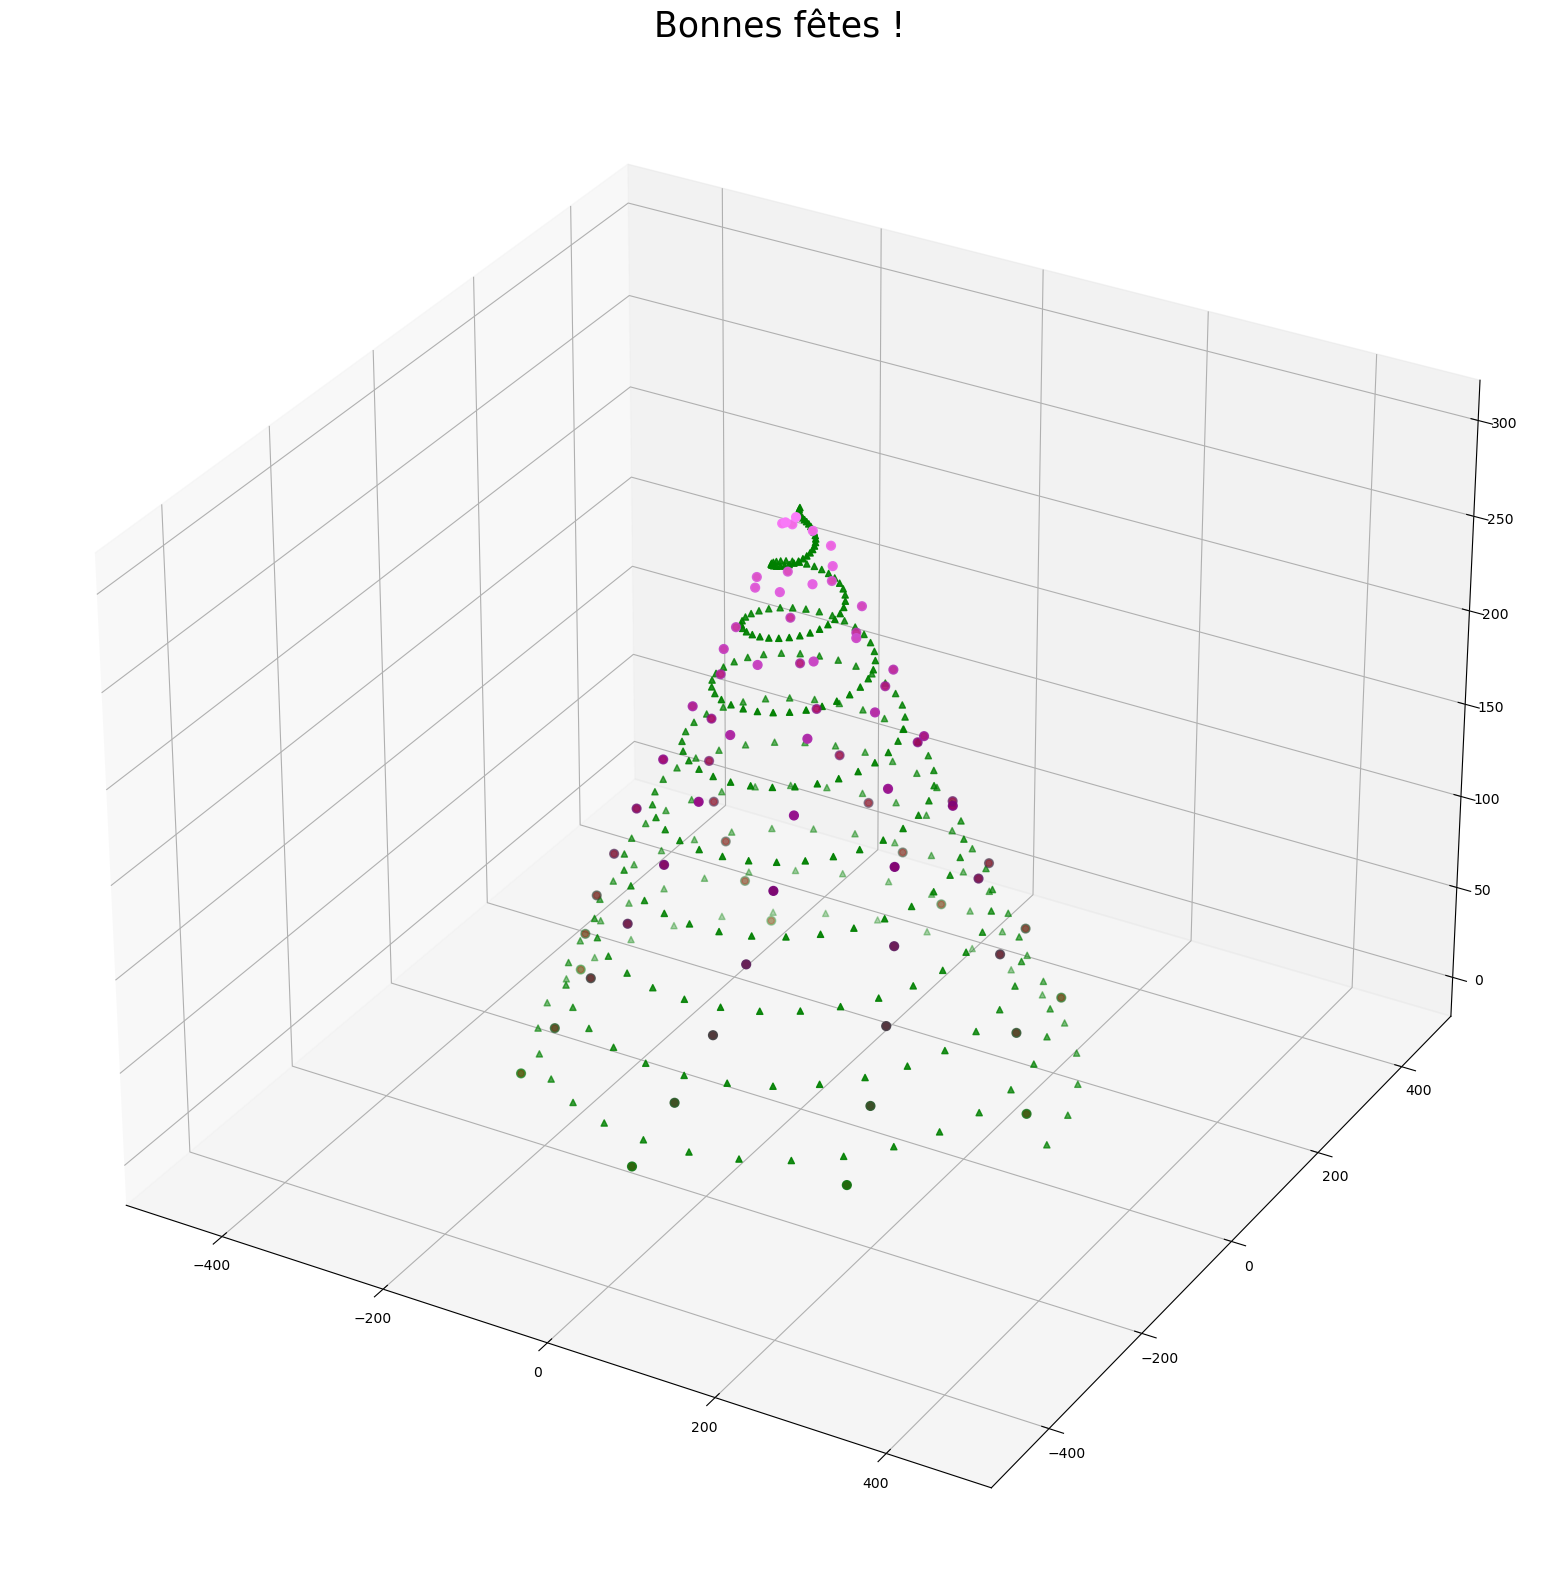

In [32]:
# Code goulûment copié de: 
# https://medium.com/analytics-vidhya/how-to-draw-a-3d-christmas-tree-with-matplotlib-aabb9bc27864

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection="3d")

k=300
Z = [i for i in range(k)]
X = [math.cos(i/5)*(k-i) for i in range(k)]
Y = [math.sin(i/5)*(k-i) for i in range(k)]
ax.scatter(X,Y,Z, c="green", marker="^")
k=300
step = 4
Z = [i for i in range(1,k,step)]
X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c="red", marker="o")

c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
ax.scatter(X,Y,Z, c=c, marker="o",s=40)


plt.xlim(-500,500)
plt.ylim(-500,500)
plt.title("Bonnes fêtes !", {'fontsize': 25})
plt.show()

